# Manipulating Time Series Data in Python

## Introduction

In this course you'll learn the basics of manipulating time series data. Time series data are data that are indexed by a sequence of dates or times. You'll learn how to use methods built into Pandas to work with this index. You'll also learn how resample time series to change the frequency. This course will also show you how to calculate rolling and cumulative values for times series.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = "data/data_Python_Manipulating_Timeseries/"

## Working with Time Series in Pandas

## Your first time series

Now, you'll create a week of data, iterate over the result, and obtain the `dayofweek` and `weekday_name` for each date.

In [4]:
# Create the range of dates here
# Use pd.date_range to create seven dates starting from '2017-1-1'

seven_days = pd.date_range(start='2017-1-1', periods=7, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


## Indexing & resampling time series

In [5]:
data = pd.read_csv(path+'data.csv')#, index_col='date')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035162,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [6]:
# Inspect data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [7]:
# Convert the date column to datetime64
pd.to_datetime(data.date)
data.head()

,date,ozone,pm25,co
0,1999-07-01,0.012024,20.000000,1.300686
1,1999-07-02,0.027699,23.900000,0.958194
2,1999-07-03,0.043969,36.700000,1.194444
3,1999-07-04,0.035162,39.000000,1.081548
4,1999-07-05,0.038359,28.171429,0.939583


In [8]:
# Inspect data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
date     6317 non-null object
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None


In [9]:
# Set date column as index
data.set_index('date', inplace=True)
# Inspect data 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
ozone    6317 non-null float64
pm25     6317 non-null float64
co       6317 non-null float64
dtypes: float64(3)
memory usage: 197.4+ KB
None


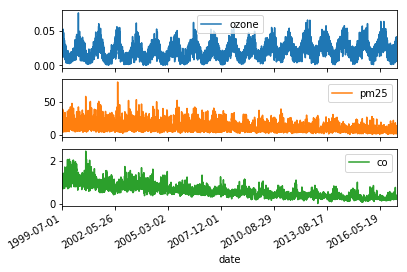

In [10]:
# Plot data
data.plot(subplots=True)
plt.show();

## Compare annual stock price trends

In the video, you have seen how to select sub-periods from a time series.

You'll use this to compare the performance for three years of Yahoo stock prices.

In [11]:
df = pd.read_csv(path+'yahoo.csv', parse_dates=True, index_col='date')
df.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [12]:
yahoo = df
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

prices.head()

,2013,2014,2015
0,20.08,NaN,NaN
1,19.78,39.59,50.17
2,19.86,40.12,49.13
3,19.40,39.93,49.21
4,19.66,40.92,48.59


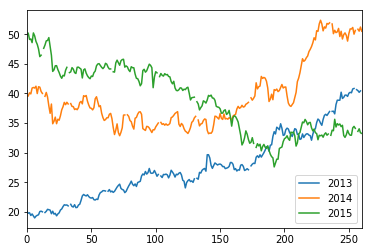

In [13]:
# Plot prices
prices.plot()
plt.show();

## Set and change time series frequency

Use data on the daily carbon monoxide concentration in NYC, LA and Chicago from 2005-17.

You'll set the frequency to calendar daily and then resample to monthly frequency, and visualize both series to see how the different frequencies affect the data.

In [14]:
df = pd.read_csv(path+'co.csv', parse_dates=True, index_col='date')
df.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


In [15]:
co = df
# Inspect data
print(co.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
Chicago        1898 non-null float64
Los Angeles    1898 non-null float64
New York       1898 non-null float64
dtypes: float64(3)
memory usage: 59.3 KB
None


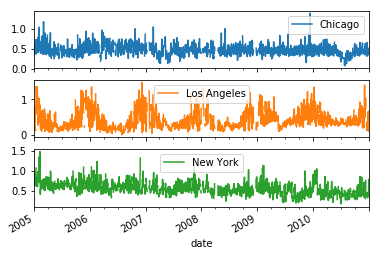

In [16]:
# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show();

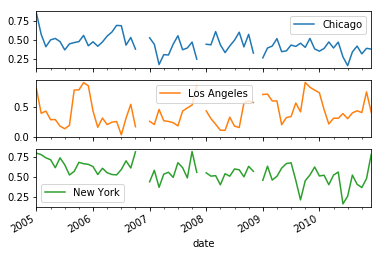

In [17]:
# Set frequency to monthly
co = co.asfreq('M')

# Plot the data
co.plot(subplots=True)
plt.show();

## Lags, changes, and returns for stock price series

## Shifting stock prices across time

The first method to manipulate time series is `.shift()`, which allows you shift all values in a Series or DataFrame by a number of periods to a different time along the DateTimeIndex.

Let's use this to visually compare a stock price series for Google shifted 90 business days into both past and future.

In [18]:
# Import data here
google = pd.read_csv(path+'google.csv', parse_dates=['Date'], index_col='Date')
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [19]:
# Set data frequency to business daily
google = google.asfreq('B')

In [20]:
# Create 'lagged' and 'shifted'
# Add new columns lagged and shifted to google that contain the Close 
#  shifted by 90 business days into past and future, respectively.
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

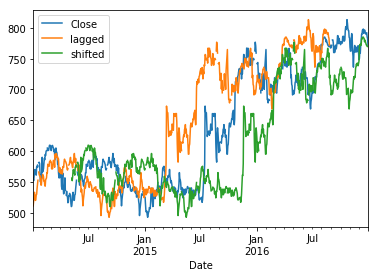

In [21]:
# Plot the google price series
google.plot()
plt.show();

## Calculating stock price changes

Calculate **returns** using current and shifted prices as input. Now you'll practice a similar calculation to 

In [22]:
# Return Floating division of series and other, element-wise (binary operator truediv)
# xt / xt-1
google['change'] = google.Close.div(google.shifted)
# Return Subtraction of series and other, element-wise (binary operator sub).
# Return Multiplication of series and other, element-wise (binary operator mul).
google['return'] = google.change.sub(1).mul(100)
google.tail(10)

,Close,lagged,shifted,change,return
Date,,,,,
2016-12-19,794.20,NaN,782.44,1.015030,1.502991
2016-12-20,796.42,NaN,777.14,1.024809,2.480891
2016-12-21,794.56,NaN,779.91,1.018784,1.878422
2016-12-22,791.26,NaN,777.50,1.017698,1.769775
2016-12-23,789.91,NaN,775.42,1.018687,1.868665
2016-12-26,NaN,NaN,772.15,NaN,NaN
2016-12-27,791.55,NaN,772.08,1.025218,2.521759
2016-12-28,785.05,NaN,769.64,1.020022,2.002235
2016-12-29,782.79,NaN,769.41,1.017390,1.738995


Calculate **absolute changes** from current and shifted prices, and compare the result to the function `.diff()`.

In [23]:
google['diff'] = google.Close.diff() # xt - xt-1
google.tail()

,Close,lagged,shifted,change,return,diff
Date,,,,,,
2016-12-26,NaN,NaN,772.15,NaN,NaN,NaN
2016-12-27,791.55,NaN,772.08,1.025218,2.521759,NaN
2016-12-28,785.05,NaN,769.64,1.020022,2.002235,-6.50
2016-12-29,782.79,NaN,769.41,1.017390,1.738995,-2.26
2016-12-30,771.82,NaN,769.54,1.002963,0.296281,-10.97


In [24]:
df = pd.read_csv(path+'yahoo.csv', parse_dates=True, index_col='date')
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


In [25]:
yahoo = df
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)
 
# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price'] - yahoo['shifted_30']
 
# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)
 
# Inspect the last five rows of price
yahoo.tail()

,price,shifted_30,change_30,diff_30
date,,,,
2015-12-25,NaN,32.19,NaN,NaN
2015-12-28,33.60,32.94,0.66,0.66
2015-12-29,34.04,32.86,1.18,1.18
2015-12-30,33.37,32.98,0.39,0.39
2015-12-31,33.26,32.62,0.64,0.64


In [26]:
# Is there any difference between change_30 and diff_30 values?
# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

0.0    703
dtype: int64


## Plotting multi-period returns

Let's use `.pct_change()` function to calculate returns for various calendar day periods, and plot the result to compare the different patterns. We'll be using Google stock prices from 2014-2016.

Create the columns 'daily_return', 'monthly_return', and 'annual_return' that contain the pct_change() of 'Close' for 1, 30 and 360 calendar days, respectively, and multiply each by 100.

In [27]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

google.tail()

,Close,lagged,shifted,change,return,diff,daily_return,monthly_return,annual_return
Date,,,,,,,,,
2016-12-26,NaN,NaN,772.15,NaN,NaN,NaN,0.000000,7.313064,24.644565
2016-12-27,791.55,NaN,772.08,1.025218,2.521759,NaN,0.207619,4.358660,19.790248
2016-12-28,785.05,NaN,769.64,1.020022,2.002235,-6.50,-0.821174,2.690718,19.026321
2016-12-29,782.79,NaN,769.41,1.017390,1.738995,-2.26,-0.287880,1.498904,19.245944
2016-12-30,771.82,NaN,769.54,1.002963,0.296281,-10.97,-1.401398,1.483157,17.454955


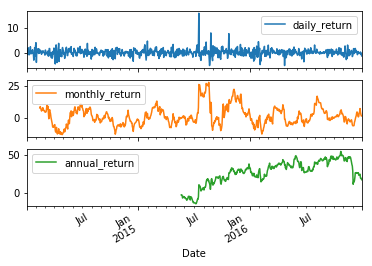

In [28]:
# Plot the result
google[['daily_return', 'monthly_return', 'annual_return']].plot(subplots=True)
plt.show();

## Basic Time Series Metrics & Resampling

## Compare the performance of several asset classes

You can easily `compare several time series by normalizing their starting points to 100`, and plot the result. To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.

In [29]:
# Import data here
# Import 'asset_classes.csv', using .read_csv() to parse dates in the 'DATE' 
#  column and set this column as the index, then assign the result to prices.
prices = pd.read_csv(path+'asset_classes.csv', parse_dates=['DATE'], index_col='DATE')
prices.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41
2007-07-05,1525.40,400.15,655.90,71.81
2007-07-06,1530.44,399.31,647.75,72.80


In [30]:
# Inspect prices here
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
SP500    2469 non-null float64
Bonds    2469 non-null float64
Gold     2469 non-null float64
Oil      2469 non-null float64
dtypes: float64(4)
memory usage: 96.4 KB
None


In [31]:
# Select first prices
# Select the first price for each series using .iloc[0] on prices 
#  and assign the result to first_prices.
first_prices = prices.iloc[0]
first_prices

SP500    1503.35
Bonds     402.15
Gold      648.50
Oil        70.47
Name: 2007-06-29 00:00:00, dtype: float64

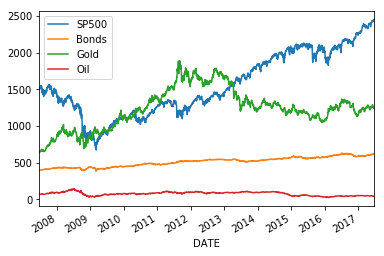

In [32]:
prices.plot()
plt.show();

In [33]:
# Create normalized
# Divide prices by first_prices, multiply by 100 
#  and assign the result to normalized.
normalized = prices.div(first_prices).mul(100)
normalized.head()

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,100.000000,100.000000,100.000000,100.000000
2007-07-02,101.069611,100.201417,100.308404,100.908188
2007-07-03,101.431470,99.967674,101.349268,101.333901
2007-07-05,101.466724,99.502673,101.141095,101.901518
2007-07-06,101.801976,99.293796,99.884348,103.306372


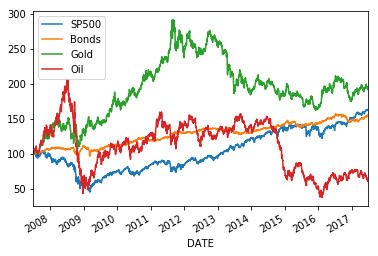

In [34]:
# Plot normalized
normalized.plot()
plt.show();

## Comparing stock prices with a benchmark

Compare the performance of various stocks against a benchmark. Learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:

Company (Stock Ticker):
- Johnson & Johnson (JNJ)
- Exxon Mobil (XOM)
- JP Morgan Chase (JPM)

In [35]:
# Import stock prices and index here
stocks = pd.read_csv(path+'nyse.csv', parse_dates=['date'], index_col='date')
dow_jones = pd.read_csv(path+'dow_jones.csv', parse_dates=['date'], index_col='date')

In [36]:
stocks.head()

,JNJ,JPM,XOM
date,,,
2010-01-04,64.68,42.85,69.15
2010-01-05,63.93,43.68,69.42
2010-01-06,64.45,43.92,70.02
2010-01-07,63.99,44.79,69.80
2010-01-08,64.21,44.68,69.52


In [37]:
dow_jones.head()

,DJIA
date,
2010-01-04,10583.96
2010-01-05,10572.02
2010-01-06,10573.68
2010-01-07,10606.86
2010-01-08,10618.19


In [38]:
# Concatenate data and inspect result here
# Use pd.concat() along axis=1 to combine stocks and dow_jones 
#  and assign the result to data. Inspect the .info() of data.
data = pd.concat([stocks, dow_jones], axis=1)
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
JNJ     1762 non-null float64
JPM     1762 non-null float64
XOM     1762 non-null float64
DJIA    1762 non-null float64
dtypes: float64(4)
memory usage: 68.8 KB
None


,JNJ,JPM,XOM,DJIA
date,,,,
2010-01-04,64.68,42.85,69.15,10583.96
2010-01-05,63.93,43.68,69.42,10572.02
2010-01-06,64.45,43.92,70.02,10573.68
2010-01-07,63.99,44.79,69.80,10606.86
2010-01-08,64.21,44.68,69.52,10618.19


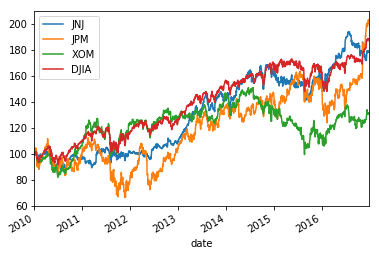

In [39]:
# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot()
plt.show();

## Plot performance difference vs benchmark index

Calculate and plot the **performance difference** of a stock in percentage points relative to a benchmark index. Let's compare the performance of Microsoft (MSFT) and Apple (AAPL) to the S&P 500 over the last 10 years.

In [40]:
# Import stock data here
stocks = pd.read_csv(path+'msft_aapl.csv', parse_dates=['date'], index_col='date')
stocks.head()

,AAPL,MSFT
date,,
2007-01-03,11.97,29.86
2007-01-04,12.24,29.81
2007-01-05,12.15,29.64
2007-01-08,12.21,29.93
2007-01-09,13.22,29.96


In [41]:
# Import index here
sp500 = pd.read_csv(path+'sp500.csv', parse_dates=['date'], index_col='date')
sp500.head()

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [42]:
# Concatenate stocks and index here
# Use pd.concat() to concatenate stocks and sp500 along axis=1, 
#  apply .dropna() to drop all missing values, and assign the result to data.
data = pd.concat([stocks, sp500], axis=1).dropna()
data.head()

,AAPL,MSFT,SP500
date,,,
2007-06-29,17.43,29.47,1503.35
2007-07-02,17.32,29.74,1519.43
2007-07-03,18.17,30.02,1524.87
2007-07-05,18.96,29.99,1525.40
2007-07-06,18.90,29.97,1530.44


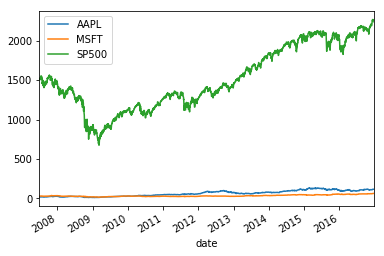

In [43]:
data.plot()
plt.show();

In [44]:
# Normalize data
normalized = data.div(data.iloc[0]).mul(100)
normalized.head()

,AAPL,MSFT,SP500
date,,,
2007-06-29,100.000000,100.000000,100.000000
2007-07-02,99.368904,100.916186,101.069611
2007-07-03,104.245554,101.866305,101.431470
2007-07-05,108.777969,101.764506,101.466724
2007-07-06,108.433735,101.696641,101.801976


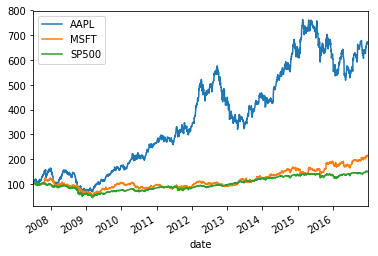

In [45]:
normalized.plot()
plt.show();

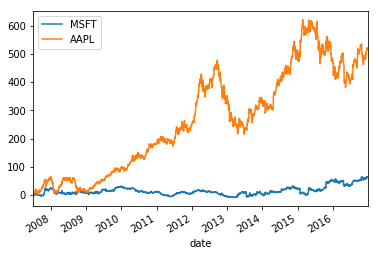

In [46]:
# Create tickers
tickers = ['MSFT', 'AAPL']

# Subtract the normalized index from the normalized stock prices, and plot the result
# Select tickers from normalized, and subtract normalized['SP500'] 
#  with keyword axis=0 to align the indexes, then plot the result.
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show();

Now you can compare these stocks to the overall market so you can more easily spot trends and outliers.

## Convert monthly to weekly data

Use `.reindex()` to conform an existing time series to a DateTimeIndex at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [47]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

In [48]:
# Create monthly_dates here
# Create monthly_dates using pd.date_range with start, 
#  end and frequency alias 'M'.
monthly_dates = pd.date_range(start=start, end=end, freq='M')
print(monthly_dates)

DatetimeIndex(['2016-01-31', '2016-02-29'], dtype='datetime64[ns]', freq='M')


In [49]:
# Create and print monthly here
# Create and print the pd.Series monthly, passing the list [1, 2] 
#  as the data argument, and using monthly_dates as index.
monthly = pd.Series(data=[1, 2], index=monthly_dates)
print(monthly)

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64


In [50]:
# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')
print(weekly_dates)

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28'],
              dtype='datetime64[ns]', freq='W-SUN')


In [51]:
# Print monthly, reindexed using weekly_dates
# Apply .reindex() to monthly three times: first without additional options, 
#  then with ffill and then with bfill, print()-ing each result.
print(monthly.reindex(weekly_dates))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64


In [52]:
print(monthly.reindex(weekly_dates, method='bfill'))

2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64


In [53]:
print(monthly.reindex(weekly_dates, method='ffill'))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


## Create weekly from monthly unemployment data

The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because you just learned how to **upsample a time series**.

You'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

In [54]:
# Import data here
df = pd.read_csv(path+'unemployment.csv', parse_dates=['date'], index_col='date')
df.head()

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [55]:
data = df
# Show first five rows of weekly series
# Convert data to weekly frequency using .asfreq() with the alias 'W' 
#  and show the first five rows.
data.asfreq('W').head()

,UNRATE
date,
2000-01-02,NaN
2000-01-09,NaN
2000-01-16,NaN
2000-01-23,NaN
2000-01-30,NaN


In [56]:
# Show first five rows of weekly series with bfill option
data.asfreq('W', method='bfill').head()

,UNRATE
date,
2000-01-02,4.1
2000-01-09,4.1
2000-01-16,4.1
2000-01-23,4.1
2000-01-30,4.1


In [57]:
# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
weekly_ffill.head()

,UNRATE
date,
2000-01-02,4.0
2000-01-09,4.0
2000-01-16,4.0
2000-01-23,4.0
2000-01-30,4.0


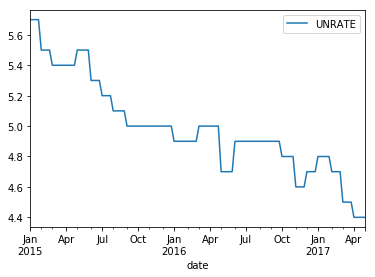

In [58]:
# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot()
plt.show();

## Use interpolation to create weekly employment data

You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods. Compare your previous approach to the new `.interpolate()` method.

In [59]:
# Import data here
df = pd.read_csv(path+'monthly.csv', parse_dates=['DATE'], index_col='DATE')
df.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [60]:
monthly = df
# Inspect data here
print(monthly.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
UNRATE    85 non-null float64
dtypes: float64(1)
memory usage: 1.3 KB
None


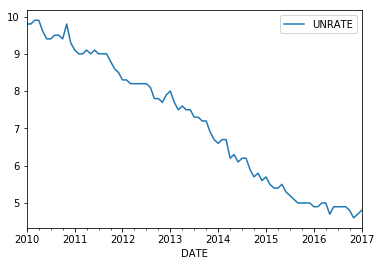

In [61]:
monthly.plot()
plt.show();

In [62]:
# Create weekly dates
# Create a pd.date_range() with weekly dates, using the .min() and .max() 
#  of the index of monthly as start and end, respectively, 
#  and assign the result to weekly_dates.
weekly_dates = pd.date_range(start=monthly.index.min(), end=monthly.index.max(), freq='W')
weekly_dates

DatetimeIndex(['2010-01-03', '2010-01-10', '2010-01-17', '2010-01-24',
               '2010-01-31', '2010-02-07', '2010-02-14', '2010-02-21',
               '2010-02-28', '2010-03-07',
               ...
               '2016-10-30', '2016-11-06', '2016-11-13', '2016-11-20',
               '2016-11-27', '2016-12-04', '2016-12-11', '2016-12-18',
               '2016-12-25', '2017-01-01'],
              dtype='datetime64[ns]', length=366, freq='W-SUN')

In [63]:
# Reindex monthly to weekly data
# Apply .reindex() using weekly_dates to monthly 
#  and assign the output to weekly.
weekly = monthly.reindex(weekly_dates)
weekly.tail()

,UNRATE
2016-12-04,NaN
2016-12-11,NaN
2016-12-18,NaN
2016-12-25,NaN
2017-01-01,4.8


In [64]:
# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()

In [65]:
weekly.tail()

,UNRATE,ffill,interpolated
2016-12-04,NaN,4.7,4.788571
2016-12-11,NaN,4.7,4.791429
2016-12-18,NaN,4.7,4.794286
2016-12-25,NaN,4.7,4.797143
2017-01-01,4.8,4.8,4.800000


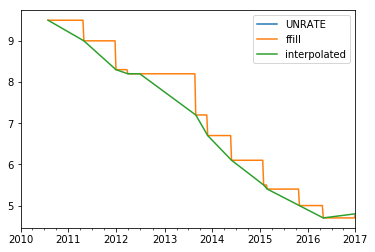

In [66]:
# Plot weekly
weekly.plot()
plt.show();

Interpolating is a useful way to create smoother time series when resampling.

## Interpolate debt/GDP and compare to unemployment

Since you have learned how to interpolate time series, you can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

In [67]:
# Import & inspect data here
data = pd.read_csv(path+'debt_unemployment.csv', parse_dates=['date'], index_col='date')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        29 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None


,Debt/GDP,Unemployment
date,,
2010-01-01,87.00386,9.8
2010-02-01,NaN,9.8
2010-03-01,NaN,9.9
2010-04-01,88.67047,9.9
2010-05-01,NaN,9.6


In [68]:
# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())
interpolated.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
Debt/GDP        89 non-null float64
Unemployment    89 non-null float64
dtypes: float64(2)
memory usage: 2.1 KB
None


,Debt/GDP,Unemployment
date,,
2010-01-01,87.003860,9.8
2010-02-01,87.559397,9.8
2010-03-01,88.114933,9.9
2010-04-01,88.670470,9.9
2010-05-01,89.135103,9.6


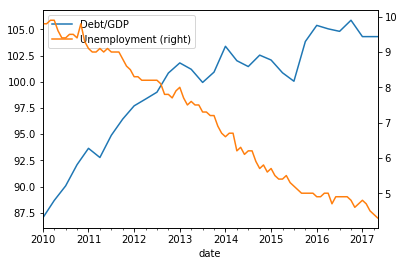

In [69]:
# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show();

## Downsampling & aggregation

## Compare weekly, monthly and annual ozone trends for NYC & LA

Downsample and aggregate time series ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

In [70]:
# Import and inspect data here
ozone = pd.read_csv(path+'ozone.csv', parse_dates=['date'], index_col='date')
print(ozone.info())
ozone.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
Los Angeles    5488 non-null float64
New York       6167 non-null float64
dtypes: float64(2)
memory usage: 147.4 KB
None


,Los Angeles,New York
date,,
2000-01-01,0.008375,0.004032
2000-01-02,NaN,0.009486
2000-01-03,NaN,0.005580
2000-01-04,0.005500,0.008717
2000-01-05,0.005000,0.013754


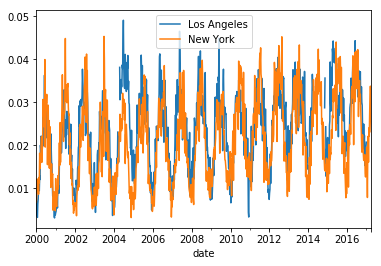

In [71]:
# Calculate and plot the weekly average ozone trend
# Apply .resample() with weekly frequency ('W') to ozone, 
#  aggregate using .mean() and plot the result.
ozone.resample('W').mean().plot()
plt.show();

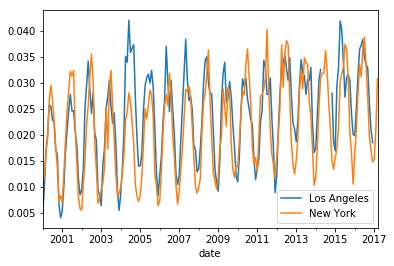

In [72]:
# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.show();

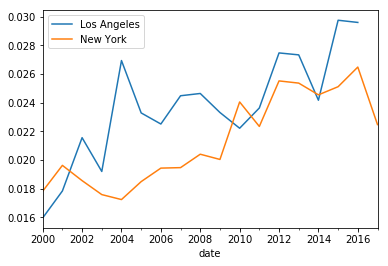

In [73]:
# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show();

## Compare monthly average stock prices for Facebook and Google

Now, you'll apply your new resampling skills to daily stock price series for Facebook and Google for the 2015-2016 period to compare the trend of the monthly averages.

In [74]:
# Import and inspect data here
stocks = pd.read_csv(path+'stocks.csv', parse_dates=['date'], index_col='date')
print(stocks.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
FB      504 non-null float64
GOOG    504 non-null float64
dtypes: float64(2)
memory usage: 11.8 KB
None


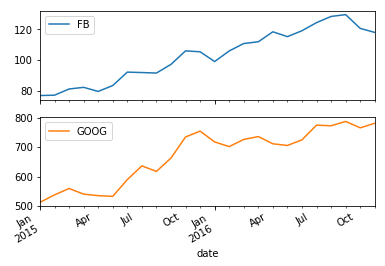

In [75]:
# Calculate and plot the monthly averages
# Create monthly_average by applying .resample() with monthly frequency to data, 
#  using .mean() to aggregate. Plot the result using subplots.
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)
plt.show();

## Compare quarterly GDP growth rate and stock returns

With your new skill to **downsample and aggregate time series**, you can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, you'll resample the stock index to quarter start frequency using the alias `'QS'`, and aggregating using the `.first()` observations.

In [76]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv(path+'gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp_growth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
gdp_growth    41 non-null float64
dtypes: float64(1)
memory usage: 656.0 bytes


In [77]:
# Import and inspect djia here
djia = pd.read_csv(path+'djia.csv', parse_dates=['date'], index_col='date')
djia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
djia    2519 non-null float64
dtypes: float64(1)
memory usage: 40.8 KB


In [78]:
# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

In [79]:
# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
# Use pd.concat() to concatenate gdp_growth and djia_quarterly_return 
#  along axis=1, and assign to data. Rename the columns using .columns 
#  and the new labels 'gdp' and 'djia', then .plot() the results.
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']

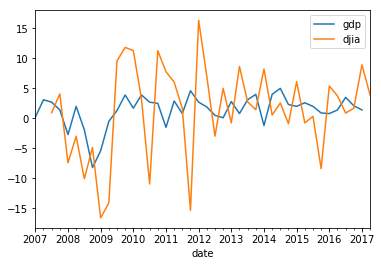

In [80]:
data.plot()
plt.show();

## Visualize monthly mean, median and standard deviation of S&P500 returns

You have also learned how to `calculate several aggregate statistics from upsampled data`. Let's use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

In [81]:
# Import data here
sp500 = pd.read_csv(path+'sp500.csv', parse_dates=['date'], index_col='date')
print(sp500.info())
sp500.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
SP500    2395 non-null float64
dtypes: float64(1)
memory usage: 37.4 KB
None


,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [82]:
# Calculate daily returns here
# Convert sp500 to a pd.Series() using .squeeze(), 
#  and apply .pct_change() to calculate daily_returns.
daily_returns = sp500.squeeze().pct_change()

In [83]:
# Resample and calculate statistics
# .resample() daily_returns to month-end frequency (alias: 'M'), 
#  and apply .agg() to calculate 'mean', 'median', and 'std'. 
#  Assign the result to stats.
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])
stats.head(10)

,mean,median,std
date,,,
2007-06-30,NaN,NaN,NaN
2007-07-31,-0.001490,0.000921,0.010908
2007-08-31,0.000668,0.001086,0.015261
2007-09-30,0.001900,0.000202,0.010000
2007-10-31,0.000676,-0.000265,0.008719
2007-11-30,-0.002010,-0.000576,0.016661
2007-12-31,-0.000374,0.001016,0.011104
2008-01-31,-0.002890,-0.004764,0.015259
2008-02-29,-0.001687,-0.000029,0.012914


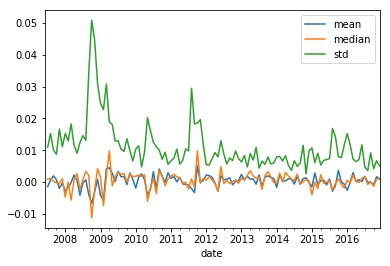

In [84]:
# Plot stats here
stats.plot()
plt.show();

## Window Functions: Rolling & Expanding Metrics

## Rolling average air quality since 2010 for new york city

To practice **rolling window functions**, you'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.

In [85]:
# Import and inspect ozone data here
data = pd.read_csv(path+'ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB
None


,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [86]:
# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling(window='90D').mean()
data['360D'] = data.Ozone.rolling(window='360D').mean()

In [87]:
data.head()

,Ozone,90D,360D
date,,,
2000-01-01,0.004032,0.004032,0.004032
2000-01-02,0.009486,0.006759,0.006759
2000-01-03,0.005580,0.006366,0.006366
2000-01-04,0.008717,0.006954,0.006954
2000-01-05,0.013754,0.008314,0.008314


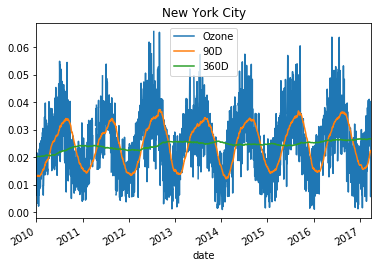

In [88]:
# Plot data
data['2010':].plot()
plt.title('New York City')
plt.show();

## Rolling 360-day median & std. deviation for nyc ozone data since 2000

Calculate several rolling statistics using the `.agg()` method, similar to `.groupby()`.

Let's take a closer look at the air quality history of NYC using the Ozone data you have seen before. The daily data are very volatile, so using a longer term rolling average can help reveal a longer term trend.

You'll be using a 360 day rolling window, and `.agg()` to calculate the rolling `median` and `standard deviation` for the daily average ozone values since 2000.

In [89]:
# Import and inspect ozone data here
data = pd.read_csv(path+'ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()
data.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [90]:
# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])
rolling_stats.tail()

,mean,std
date,,
2017-03-27,0.026629,0.011599
2017-03-28,0.026583,0.011617
2017-03-29,0.026584,0.011617
2017-03-30,0.026599,0.011613
2017-03-31,0.026607,0.011618


In [91]:
# Join rolling_stats with ozone data
stats = data.join(rolling_stats)
stats.head()

,Ozone,mean,std
date,,,
2000-01-01,0.004032,NaN,NaN
2000-01-02,0.009486,NaN,NaN
2000-01-03,0.005580,NaN,NaN
2000-01-04,0.008717,NaN,NaN
2000-01-05,0.013754,NaN,NaN


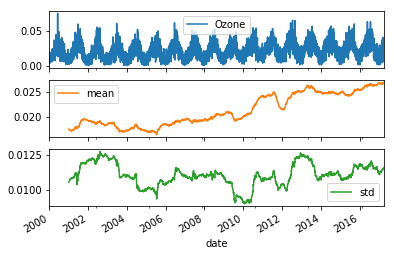

In [92]:
# Plot stats
stats.plot(subplots=True)
plt.show();

How does adding the standard deviation help you understand what's happening in the orignal series?

## Rolling quantiles for daily air quality in nyc

Calculate **rolling quantiles** to describe changes in the dispersion of a time series over time in a way that is less sensitive to outliers than using the mean and standard deviation.

Let's calculate rolling quantiles - at 10%, 50% (median) and 90% - of the distribution of daily average ozone concentration in NYC using a 360-day rolling window.

In [93]:
# Import and inspect ozone data here
data = pd.read_csv(path+'ozone_nyc.csv', parse_dates=['date'], index_col='date').dropna()
data.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [94]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
Ozone    6300 non-null float64
dtypes: float64(1)
memory usage: 98.4 KB
None


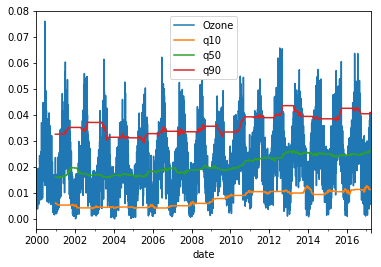

In [95]:
# Create the rolling window
rolling = data.Ozone.rolling(360)

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot monthly returns
data.plot()
plt.show();

The rolling quantiles help show the volatility of the series.

## Expanding window functions with pandas

## Cumulative sum vs .diff()

**Expanding windows** allow you to run **cumulative calculations**.

The **cumulative sum method** has in fact the opposite effect of the `.diff()` method that you came across earlier. To illustrate this, let's use the Google stock price time series, create the differences between prices, and reconstruct the series using the **cumulative sum**.

In [96]:
# Import data here
df = pd.read_csv(path+'google.csv', parse_dates=['Date'], index_col='Date').dropna()
df.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [97]:
# Calculate differences
differences = df.diff().dropna()
differences.head()

,Close
Date,
2014-01-03,-4.05
2014-01-06,6.15
2014-01-07,10.76
2014-01-08,1.18
2014-01-09,-5.49


In [98]:
# Select start price
start_price = df.first('D')
start_price

,Close
Date,
2014-01-02,556.0


In [99]:
# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()
cumulative_sum.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-06,558.10
2014-01-07,568.86
2014-01-08,570.04


In [100]:
# Validate cumulative sum equals data
print(df.equals(cumulative_sum))

True


The `.cumsum()` method allows you to reconstruct the original data from the differences.

## Cumulative return on $1,000 invested in google vs apple I

To put your new ability to do **cumulative return** calculations to practical use, let's compare how much $1,000 would be worth if invested in Google ('GOOG') or Apple ('AAPL') in 2010.

In [101]:
# Import data here
df = pd.read_csv(path+'data_ga.csv', parse_dates=['Date'], index_col='Date')
df.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06
2010-01-05,NaN,311.68
2010-01-06,NaN,303.83
2010-01-07,NaN,296.75
2010-01-08,NaN,300.71


In [102]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = df.pct_change()
returns.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,-0.004408
2010-01-06,NaN,-0.025186
2010-01-07,NaN,-0.023303
2010-01-08,NaN,0.013345


In [103]:
# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

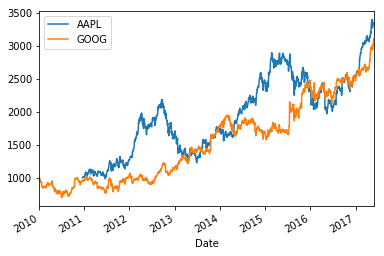

In [104]:
# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show();

## Cumulative return on $1,000 invested in google vs apple II

Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.

To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

In [105]:
# Import numpy
import numpy as np

In [106]:
# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

In [107]:
# Import data here
df = pd.read_csv(path+'data_ga.csv', parse_dates=['Date'], index_col='Date')
df.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,313.06
2010-01-05,NaN,311.68
2010-01-06,NaN,303.83
2010-01-07,NaN,296.75
2010-01-08,NaN,300.71


In [108]:
# Calculate daily returns
daily_returns = df.pct_change()
daily_returns.head()

,AAPL,GOOG
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,-0.004408
2010-01-06,NaN,-0.025186
2010-01-07,NaN,-0.023303
2010-01-08,NaN,0.013345


In [109]:
# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)
rolling_annual_returns.tail()

,AAPL,GOOG
Date,,
2017-05-24,0.528052,0.303415
2017-05-25,0.533333,0.323315
2017-05-26,0.538254,0.320434
2017-05-30,0.569342,0.350998
2017-05-31,0.560049,0.335742


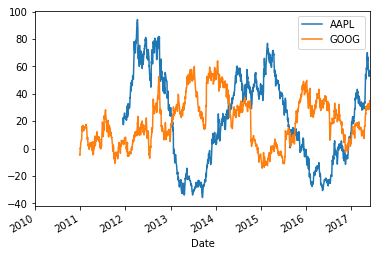

In [110]:
# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot()
plt.show();

## Case study: S&P500 price simulation



**Random walk (Błądzenie losowe)** – pojęcie z zakresu matematyki i fizyki określające ruch losowy: w kolejnych chwilach czasu cząstka przemieszcza się z aktualnego położenia do innego, losowo wybranego. `Błądzenie losowe jest przykładem prostego procesu stochastycznego`.

## Random walk I

You'll build your own **random walk** by drawing random numbers from the normal distribution with the help of numpy.

In [111]:
from numpy.random import normal, seed
from scipy.stats import norm

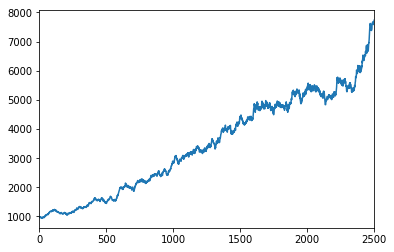

In [112]:
# Set seed here
seed = 42

# Create random_walk
# Use normal to generate 2,500 random returns with the parameters 
# loc=.001, scale=.01 and assign this to random_walk.
random_walk = normal(loc=.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
# Create random_prices by adding 1 to random_walk 
# and calculating the cumulative product.
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
# Multiply random_prices by 1,000 
# and plot the result for a price series starting at 1,000.
random_prices.mul(1000).plot()
plt.show();

## Random walk II

You'll build a **random walk** using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. Then you'll simulate an alternative random price path in the next exercise.

In [113]:
# Import data here
df = pd.read_csv(path+'fb.csv', parse_dates=True, index_col=0, header=None)
df.index.name = 'date'
df.columns = ['price']
df.head()

,price
date,
2012-05-17,38.00
2012-05-18,38.23
2012-05-21,34.03
2012-05-22,31.00
2012-05-23,32.00


In [114]:
fb = df['price']

In [115]:
import pandas as pd
from numpy.random import choice, random
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed here
seed = 42

In [116]:
# Calculate daily_returns here
daily_returns = fb.pct_change().dropna()
print(daily_returns)

date
2012-05-18    0.006053
2012-05-21   -0.109861
2012-05-22   -0.089039
2012-05-23    0.032258
2012-05-24    0.032188
2012-05-25   -0.033909
2012-05-29   -0.096208
2012-05-30   -0.022538
2012-05-31    0.050018
2012-06-01   -0.063514
2012-06-04   -0.029582
2012-06-05   -0.038290
2012-06-06    0.036336
2012-06-07   -0.018650
2012-06-08    0.030027
2012-06-11   -0.003690
2012-06-12    0.014815
2012-06-13   -0.004745
2012-06-14    0.037404
2012-06-15    0.060799
2012-06-18    0.046651
2012-06-19    0.015918
2012-06-20   -0.009715
2012-06-21    0.007595
2012-06-22    0.038003
2012-06-25   -0.029955
2012-06-26    0.032439
2012-06-27   -0.026284
2012-06-28   -0.026993
2012-06-29   -0.008291
                ...   
2017-04-19    0.009293
2017-04-20    0.010754
2017-04-21   -0.000834
2017-04-24    0.012458
2017-04-25    0.007012
2017-04-26    0.000478
2017-04-27    0.007778
2017-04-28    0.017265
2017-05-01    0.014709
2017-05-02    0.002099
2017-05-03   -0.006414
2017-05-04   -0.006258
2017-0

In [117]:
# Get n_obs
n_obs = daily_returns.count()
print(n_obs)

1266


In [118]:
# Create random_walk
random_walk = choice(daily_returns, size=n_obs)
random_walk

array([0.01112696, 0.00184685, 0.00709801, ..., 0.0106617 , 0.01255887,
       0.00855337])

In [119]:
# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

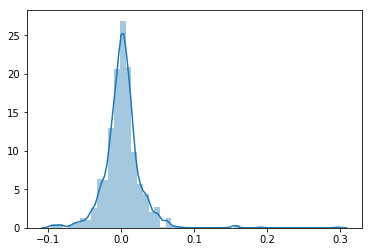

In [120]:
# Plot random_walk distribution
sns.distplot(random_walk)
plt.show();

## Random walk III

In this exercise, you'll complete your random walk simulation using Facebook stock returns over the last five years. You'll start off with a random sample of returns like the one you've generated during the last exercise and use it to create a random stock price path.

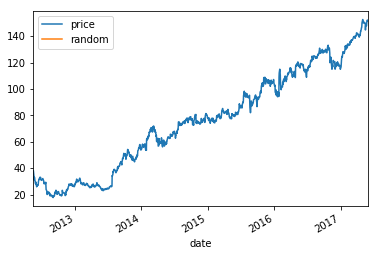

In [121]:
# Select fb start price here
start = df.price.first('D')
 
# Add 1 to random walk and append to start
random_walk = random_walk.add(1)
random_price = start.append(random_walk)
 
# Calculate cumulative product here
random_price = random_price.cumprod()
 
# Insert into fb and plot
df['random'] = random_price
 
df.plot()
plt.show();

## Relationships between time series: correlation

## Annual return correlations among several stocks

In this exercise, we have provided you with the historical stock prices for Apple (AAPL), Amazon (AMZN), IBM (IBM), WalMart (WMT), and Exxon Mobile (XOM) for the last 4,000 trading days from July 2001 until the end of May 2017.

You'll calculate the year-end returns, the **pairwise correlations** among all stocks, and visualize the result as an annotated heatmap.

In [122]:
# Import data here
df = pd.read_csv(path+'data_corr.csv', parse_dates=True, index_col=0)
df.head()

,AAPL,AMZN,IBM,WMT,XOM
Date,,,,,
2001-07-05,1.66,15.27,NaN,NaN,NaN
2001-07-06,1.57,15.27,106.50,47.34,43.40
2001-07-09,1.62,15.81,104.72,48.25,43.36
2001-07-10,1.51,15.61,101.96,47.50,42.88
2001-07-11,1.61,15.34,103.85,48.85,42.48


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4001 entries, 2001-07-05 to 2017-05-31
Data columns (total 5 columns):
AAPL    4000 non-null float64
AMZN    4000 non-null float64
IBM     4000 non-null float64
WMT     4000 non-null float64
XOM     4000 non-null float64
dtypes: float64(5)
memory usage: 187.5 KB
None
          AAPL      AMZN       IBM       WMT       XOM
AAPL  1.000000  0.208731  0.460568 -0.183553  0.336413
AMZN  0.208731  1.000000  0.346407 -0.367620 -0.133965
IBM   0.460568  0.346407  1.000000  0.155445  0.367253
WMT  -0.183553 -0.367620  0.155445  1.000000  0.178833
XOM   0.336413 -0.133965  0.367253  0.178833  1.000000


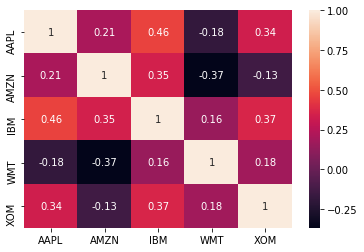

In [123]:
data = df
# Inspect data here
print(data.info())
 
# Calculate year-end prices here
annual_prices = data.resample('A').last()
 
# Calculate annual returns here
annual_returns = annual_prices.pct_change()
 
# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)
 
# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show();

# Use Case

## Explore and clean company listing information

To get started with the construction of a market-value based index, you'll work with the combined listing info for the three largest US stock exchanges, the NYSE, the NASDAQ and the AMEX.

In this and the next exercise, you will calculate market-cap weights for these stocks.

We have already imported `pandas` as pd, and loaded the `listings` data set with listings information from the NYSE, NASDAQ, and AMEX. The column `'Market Capitalization'` is already measured in USD mn.

In [124]:
listings = pd.read_csv(path+'listings.csv')

In [125]:
# Inspect listings
print(listings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 9 columns):
Unnamed: 0               6674 non-null int64
Exchange                 6674 non-null object
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 469.3+ KB
None


In [126]:
# Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)

# Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)

# Select companies with IPO Year before 2019
listings = listings[listings['IPO Year']<2019]

# Inspect the new listings data
print(listings.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 8 columns):
Unnamed: 0               2349 non-null int64
Exchange                 2349 non-null object
Company Name             2349 non-null object
Last Sale                2349 non-null float64
Market Capitalization    2349 non-null float64
IPO Year                 2349 non-null float64
Sector                   2349 non-null object
Industry                 2349 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 165.2+ KB
None


In [127]:
# Show the number of companies per sector
print(listings.groupby(['Sector']).size().sort_values(ascending=False))

Sector
Health Care              445
Consumer Services        402
Technology               386
Finance                  351
Energy                   144
Capital Goods            143
Public Utilities         104
Basic Industries         104
Consumer Non-Durables     89
Miscellaneous             68
Transportation            58
Consumer Durables         55
dtype: int64


## Select and inspect index components

Now that you have imported and cleaned the `listings` data, you can proceed to select the `index` components as the largest company for each sector by market capitalization.

You'll also have the opportunity to take a closer look at the components, their last market value, and last price.

In [129]:
# Select largest company for each sector
components = listings.groupby('Sector')['Market Capitalization'].nlargest(1)

# Print components, sorted by market cap
print(components.sort_values(ascending=False))

Sector                 Stock Symbol
Technology             AAPL            740024.467000
Consumer Services      AMZN            422138.530626
Miscellaneous          BABA            275525.000000
Health Care            AMGN            118927.210535
Transportation         UPS              90180.886756
Finance                GS               88840.590477
Consumer Non-Durables  ABEV             88240.198455
Basic Industries       RIO              70431.476895
Public Utilities       TEF              54609.806092
Capital Goods          GM               50086.335099
Energy                 PAA              22223.001416
Consumer Durables      CPRT             13620.922869
Name: Market Capitalization, dtype: float64


In [130]:
# Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)

Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [131]:
# Print company name, market cap, and last price for each component 
info_cols = ['Company Name', 'Market Capitalization', 'Last Sale']
print(listings.loc[tickers, info_cols].sort_values(by='Market Capitalization', ascending=False))

                                    Company Name  Market Capitalization  \
Stock Symbol                                                              
AAPL                                  Apple Inc.          740024.467000   
AMZN                            Amazon.com, Inc.          422138.530626   
BABA               Alibaba Group Holding Limited          275525.000000   
AMGN                                  Amgen Inc.          118927.210535   
UPS                  United Parcel Service, Inc.           90180.886756   
GS               Goldman Sachs Group, Inc. (The)           88840.590477   
ABEV                                  Ambev S.A.           88240.198455   
RIO                                Rio Tinto Plc           70431.476895   
TEF                                Telefonica SA           54609.806092   
GM                        General Motors Company           50086.335099   
PAA           Plains All American Pipeline, L.P.           22223.001416   
CPRT                     

## Import index component price information
Now you'll use the stock symbols for the companies you selected in the last exercise to calculate returns for each company.

In [132]:
# Print tickers
print(tickers)

Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [134]:
# Import prices and inspect result
stock_prices = pd.read_csv(path+'stock_data.csv', parse_dates=['Date'], index_col='Date')
print(stock_prices.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
AAPL    1761 non-null float64
AMGN    1761 non-null float64
AMZN    1761 non-null float64
CPRT    1761 non-null float64
EL      1762 non-null float64
GS      1762 non-null float64
ILMN    1761 non-null float64
MA      1762 non-null float64
PAA     1762 non-null float64
RIO     1762 non-null float64
TEF     1762 non-null float64
UPS     1762 non-null float64
dtypes: float64(12)
memory usage: 179.0 KB
None


In [135]:
# Calculate the returns
price_return = (stock_prices.iloc[-1]/stock_prices.iloc[0]).sub(1).mul(100)

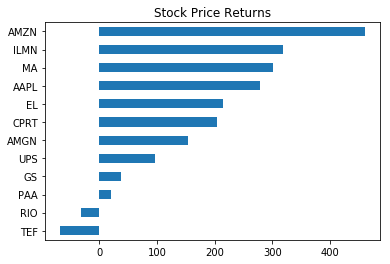

In [136]:
# Plot horizontal bar chart of sorted price_return   
price_return.sort_values().plot(kind='barh')
plt.title('Stock Price Returns')
plt.show()

## Calculate number of shares outstanding
The next step towards building a value-weighted index is to calculate the number of shares for each index component.

The number of shares will allow you to calculate the total market capitalization for each component given the historical price series in the next exercise.

In [137]:
# Inspect listings and print tickers
print(listings.info())
print(tickers)

<class 'pandas.core.frame.DataFrame'>
Index: 2349 entries, ACU to ZTO
Data columns (total 8 columns):
Unnamed: 0               2349 non-null int64
Exchange                 2349 non-null object
Company Name             2349 non-null object
Last Sale                2349 non-null float64
Market Capitalization    2349 non-null float64
IPO Year                 2349 non-null float64
Sector                   2349 non-null object
Industry                 2349 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB
None
Index(['RIO', 'GM', 'CPRT', 'ABEV', 'AMZN', 'PAA', 'GS', 'AMGN', 'BABA', 'TEF',
       'AAPL', 'UPS'],
      dtype='object', name='Stock Symbol')


In [138]:
# Select components and relevant columns from listings
components = listings.loc[tickers,['Market Capitalization', 'Last Sale']]

# Print the first rows of components
print(components.head())

              Market Capitalization  Last Sale
Stock Symbol                                  
RIO                    70431.476895      38.94
GM                     50086.335099      33.39
CPRT                   13620.922869      29.65
ABEV                   88240.198455       5.62
AMZN                  422138.530626     884.67


In [139]:
# Calculate the number of shares here
no_shares = components['Market Capitalization']/components['Last Sale']

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))

Stock Symbol
ABEV    15701.102928
AAPL     5246.540000
TEF      5037.804990
BABA     2500.000000
RIO      1808.717948
GM       1500.039985
UPS       869.297154
AMGN      735.890171
PAA       723.404994
AMZN      477.170618
CPRT      459.390316
GS        397.817439
dtype: float64


## Create time series of market value
You can now use the number of shares to calculate the total market capitalization for each component and trading date from the historical price series.

The result will be the key input to construct the value-weighted stock index, which you will complete in the next exercise.

In [141]:
# Select the number of shares
print(no_shares.sort_values())

Stock Symbol
GS        397.817439
CPRT      459.390316
AMZN      477.170618
PAA       723.404994
AMGN      735.890171
UPS       869.297154
GM       1500.039985
RIO      1808.717948
BABA     2500.000000
TEF      5037.804990
AAPL     5246.540000
ABEV    15701.102928
dtype: float64


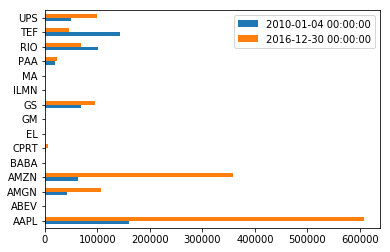

In [142]:
# Create the series of market cap per ticker
market_cap = stock_prices * no_shares

# Select first and last market cap here
first_value = market_cap.iloc[0,]
last_value = market_cap.iloc[-1,]

# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()

## Calculate & plot the composite index
By now you have all ingredients that you need to calculate the aggregate stock performance for your group of companies.

Use the time series of market capitalization that you created in the last exercise to aggregate the market value for each period, and then normalize this series to convert it to an index.

In [144]:
market_cap

,AAPL,ABEV,AMGN,AMZN,BABA,CPRT,EL,GM,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,,,,
2010-01-04,160386.7278,NaN,42475.580670,63893.145750,NaN,2090.225938,NaN,NaN,68854.242342,NaN,NaN,19531.934838,101342.466626,143829.332465,50575.708420
2010-01-05,160701.5202,NaN,42107.635585,64270.110538,NaN,2090.225938,NaN,NaN,70071.563705,NaN,NaN,19748.956336,102916.051241,143728.576365,50662.638135
2010-01-06,158130.7156,NaN,41791.202811,63105.814231,NaN,2081.038131,NaN,NaN,69323.666920,NaN,NaN,19741.722286,106063.220471,142217.234868,50288.840359
2010-01-07,157815.9232,NaN,41408.539922,62032.180340,NaN,2067.256422,NaN,NaN,70680.224387,NaN,NaN,19502.998638,106081.307650,139799.088473,49906.349611
2010-01-08,158865.2312,NaN,41776.485008,63711.820915,NaN,2076.444228,NaN,NaN,69343.557792,NaN,NaN,19568.105088,107256.974316,138892.283574,52305.609756
2010-01-11,157501.1308,NaN,41960.457550,62180.103232,NaN,2067.256422,NaN,NaN,68249.559835,NaN,NaN,19531.934838,106316.440983,135869.600580,54609.247214
2010-01-12,155664.8418,NaN,41231.926281,60767.678202,NaN,2053.474713,NaN,NaN,66761.722613,NaN,NaN,19206.402591,103169.271754,134862.039582,54244.142410
2010-01-13,157868.3886,NaN,41599.871367,61607.498490,NaN,2035.099100,NaN,NaN,67258.994412,NaN,NaN,19314.913340,105773.825599,136272.624980,53957.274349
2010-01-14,156976.4768,NaN,41327.592003,60767.678202,NaN,2053.474713,NaN,NaN,67044.172995,NaN,NaN,19358.317639,107546.369188,135768.844481,54070.282979


In [145]:
# Aggregate and print the market cap per trading day
raw_index = market_cap.sum(axis=1)
print(raw_index)

Date
2010-01-04    6.529794e+05
2010-01-05    6.562973e+05
2010-01-06    6.527435e+05
2010-01-07    6.492939e+05
2010-01-08    6.537965e+05
2010-01-11    6.482857e+05
2010-01-12    6.379615e+05
2010-01-13    6.456885e+05
2010-01-14    6.449132e+05
2010-01-15    6.364399e+05
2010-01-19    6.509454e+05
2010-01-20    6.371634e+05
2010-01-21    6.200331e+05
2010-01-22    6.014531e+05
2010-01-25    6.070362e+05
2010-01-26    6.057960e+05
2010-01-27    6.095082e+05
2010-01-28    5.976947e+05
2010-01-29    5.853376e+05
2010-02-01    5.936559e+05
2010-02-02    5.995001e+05
2010-02-03    5.984773e+05
2010-02-04    5.745696e+05
2010-02-05    5.783985e+05
2010-02-08    5.727457e+05
2010-02-09    5.847965e+05
2010-02-10    5.826787e+05
2010-02-11    5.886241e+05
2010-02-12    5.868744e+05
2010-02-16    5.978973e+05
                  ...     
2016-11-17    1.368558e+06
2016-11-18    1.367488e+06
2016-11-21    1.389323e+06
2016-11-22    1.393518e+06
2016-11-23    1.390175e+06
2016-11-25    1.393082e

In [146]:
# Normalize the aggregate market cap here 
index = raw_index.div(raw_index.iloc[0,]).mul(100)
print(index)

Date
2010-01-04    100.000000
2010-01-05    100.508119
2010-01-06     99.963872
2010-01-07     99.435588
2010-01-08    100.125141
2010-01-11     99.281197
2010-01-12     97.700101
2010-01-13     98.883445
2010-01-14     98.764715
2010-01-15     97.467082
2010-01-19     99.688507
2010-01-20     97.577871
2010-01-21     94.954468
2010-01-22     92.109059
2010-01-25     92.964065
2010-01-26     92.774143
2010-01-27     93.342645
2010-01-28     91.533472
2010-01-29     89.641058
2010-02-01     90.914957
2010-02-02     91.809968
2010-02-03     91.653332
2010-02-04     87.992006
2010-02-05     88.578380
2010-02-08     87.712673
2010-02-09     89.558185
2010-02-10     89.233866
2010-02-11     90.144368
2010-02-12     89.876411
2010-02-16     91.564508
                 ...    
2016-11-17    209.586768
2016-11-18    209.422852
2016-11-21    212.766783
2016-11-22    213.409231
2016-11-23    212.897280
2016-11-25    213.342476
2016-11-28    211.820122
2016-11-29    211.419447
2016-11-30    210.18

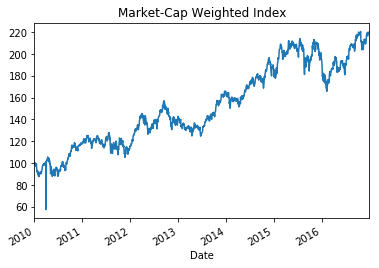

In [147]:
# Plot the index here
index.plot()
plt.title('Market-Cap Weighted Index')
plt.show()

## Calculate the contribution of each stock to the index
You have successfully built the value-weighted index. Let's now explore how it performed over the 2010-2016 period.

Let's also determine how much each stock has contributed to the index return.

In [149]:
# Calculate and print the index return here
index_return = (index.iloc[-1,]/(index.iloc[0,])-1)*(100)
print(index_return)

116.48627582170694


In [150]:
# Select the market capitalization
market_cap = components['Market Capitalization']

# Calculate the total market cap
total_market_cap = market_cap.sum(axis=0)

# Calculate the component weights, and print the result
weights = market_cap.div(total_market_cap)
print(weights.sort_values())

Stock Symbol
CPRT    0.006694
PAA     0.010921
GM      0.024614
TEF     0.026837
RIO     0.034613
ABEV    0.043365
GS      0.043660
UPS     0.044318
AMGN    0.058445
BABA    0.135403
AMZN    0.207455
AAPL    0.363675
Name: Market Capitalization, dtype: float64


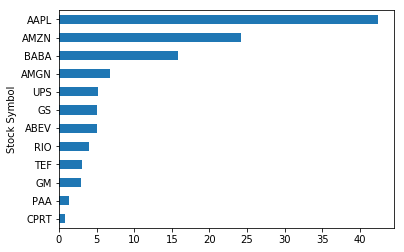

In [151]:
# Calculate and plot the contribution by component
weights.mul(index_return).sort_values().plot(kind='barh')
plt.show()